# Notes

- Most questionable part was the use of label encoder for preprocessing categorical features but it highly increased the capability of the model, might need to look into other solutions that are less controversial
- Great EDA
- Developed and evaluated a random forest model with great metrics

<b> Comments <b>
- Satisfied with the aesthetic choices for mushrooms

# Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
secondary_mushroom = fetch_ucirepo(id=848) 
  
# data (as pandas dataframes) 
X = secondary_mushroom.data.features 
y = secondary_mushroom.data.targets

In [3]:
secondary_mushroom.metadata

{'uci_id': 848,
 'name': 'Secondary Mushroom',
 'repository_url': 'https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset',
 'data_url': 'https://archive.ics.uci.edu/static/public/848/data.csv',
 'abstract': 'Dataset of simulated mushrooms for binary classification into edible and poisonous.',
 'area': 'Biology',
 'tasks': ['Classification'],
 'characteristics': ['Tabular'],
 'num_instances': 61068,
 'num_features': 20,
 'feature_types': ['Real'],
 'demographics': [],
 'target_col': ['class'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 2021,
 'last_updated': 'Wed Apr 10 2024',
 'dataset_doi': '10.24432/C5FP5Q',
 'creators': ['Dennis Wagner', 'D. Heider', 'Georges Hattab'],
 'intro_paper': {'ID': 259,
  'type': 'NATIVE',
  'title': 'Mushroom data creation, curation, and simulation to support classification tasks',
  'authors': 'Dennis Wagner, D. Heider, Georges Hattab',
  'venue': 'Scientific Reports',
  'y

In [4]:
secondary_mushroom.variables

,name,role,type,demographic,description,units,missing_values
0,class,Target,Categorical,None,None,None,no
1,cap-diameter,Feature,Continuous,None,None,None,no
2,cap-shape,Feature,Categorical,None,None,None,no
3,cap-surface,Feature,Categorical,None,None,None,yes
4,cap-color,Feature,Categorical,None,None,None,no
5,does-bruise-or-bleed,Feature,Categorical,None,None,None,no
6,gill-attachment,Feature,Categorical,None,None,None,yes
7,gill-spacing,Feature,Categorical,None,None,None,yes
8,gill-color,Feature,Categorical,None,None,None,no
9,stem-height,Feature,Continuous,None,None,None,no


In [5]:
data = pd.concat((X,y),axis = 1)

In [6]:
y = y.values.squeeze()

In [7]:
data

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,class
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,...,y,w,u,w,t,g,NaN,d,w,p
1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,...,y,w,u,w,t,g,NaN,d,u,p
2,14.07,x,g,o,f,e,NaN,w,17.80,17.74,...,y,w,u,w,t,g,NaN,d,w,p
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,...,y,w,u,w,t,p,NaN,d,w,p
4,14.64,x,h,o,f,e,NaN,w,16.53,17.20,...,y,w,u,w,t,p,NaN,d,w,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1.18,s,s,y,f,f,f,f,3.93,6.22,...,NaN,y,NaN,NaN,f,f,NaN,d,a,p
61065,1.27,f,s,y,f,f,f,f,3.18,5.43,...,NaN,y,NaN,NaN,f,f,NaN,d,a,p
61066,1.27,s,s,y,f,f,f,f,3.86,6.37,...,NaN,y,NaN,NaN,f,f,NaN,d,u,p
61067,1.24,f,s,y,f,f,f,f,3.56,5.44,...,NaN,y,NaN,NaN,f,f,NaN,d,u,p


# EDA

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          61069 non-null  float64
 1   cap-shape             61069 non-null  object 
 2   cap-surface           46949 non-null  object 
 3   cap-color             61069 non-null  object 
 4   does-bruise-or-bleed  61069 non-null  object 
 5   gill-attachment       51185 non-null  object 
 6   gill-spacing          36006 non-null  object 
 7   gill-color            61069 non-null  object 
 8   stem-height           61069 non-null  float64
 9   stem-width            61069 non-null  float64
 10  stem-root             9531 non-null   object 
 11  stem-surface          22945 non-null  object 
 12  stem-color            61069 non-null  object 
 13  veil-type             3177 non-null   object 
 14  veil-color            7413 non-null   object 
 15  has-ring           

Splitting the data into numeric and categorical for easier EDA

In [9]:
data_numeric = pd.concat((data.select_dtypes(include = "number"),data["class"]), axis=1)

In [10]:
data_categoric = data.select_dtypes(include = "object")

In [11]:
data.duplicated().sum(), data.drop_duplicates(inplace=True)

(146, None)

In [12]:
data.isna().sum()

cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9855
gill-spacing            25062
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51536
stem-surface            38122
stem-color                  0
veil-type               57746
veil-color              53510
has-ring                    0
ring-type                2471
spore-print-color       54597
habitat                     0
season                      0
class                       0
dtype: int64

Class has no null values which means that most instances will be usable 

In [13]:
value_counts_list = {}
for col in data_categoric.columns:
    i = {col:len(data[col].value_counts())}
    value_counts_list.update(i)

value_counts_ = pd.DataFrame.from_dict(value_counts_list, orient = "index", columns=['Value Counts'])


value_list = {}

for col in data_categoric.columns:
    values = {col : [data_categoric[col].unique()]}
    value_list.update(values)
    
unique_values_list = pd.DataFrame.from_dict(value_list,orient='index', columns = ["Unique Values"])



unique_values_df = pd.merge(left= value_counts_,
    right = unique_values_list,
    how='inner',
    left_index=True, right_index=True)

unique_values_df

,Value Counts,Unique Values
cap-shape,7,"[x, f, p, b, c, s, o]"
cap-surface,11,"[g, h, nan, t, y, e, s, l, d, w, i, k]"
cap-color,12,"[o, e, n, g, r, w, y, p, u, b, l, k]"
does-bruise-or-bleed,2,"[f, t]"
gill-attachment,7,"[e, nan, a, d, s, x, p, f]"
gill-spacing,3,"[nan, c, d, f]"
gill-color,12,"[w, n, p, u, b, g, y, r, e, o, k, f]"
stem-root,5,"[s, nan, b, r, c, f]"
stem-surface,8,"[y, nan, s, k, i, h, t, g, f]"
stem-color,13,"[w, y, n, u, b, l, r, p, e, k, g, o, f]"


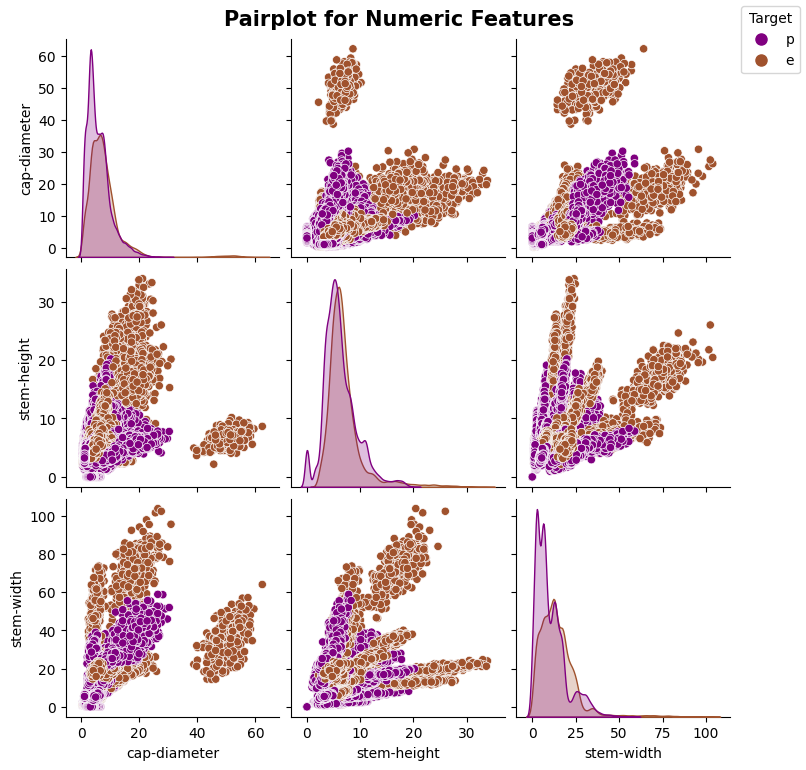

In [61]:
target_mapping = {"p":"purple", "e":"sienna"}
hue_colors = list(target_mapping.values())
hue_labels = list(target_mapping.keys())

g = sns.pairplot(data_numeric, hue="class", palette = target_mapping, corner=False, diag_kind="kde", aspect=10/10)

g.fig.suptitle("Pairplot for Numeric Features", fontweight="bold", fontsize=15, y=1.02)
g.legend.remove()

handles = [plt.Line2D([0], [0], marker='o', color=color, linestyle='', markersize=8) 
           for color in hue_colors]
g.fig.legend(handles, hue_labels, loc='upper right', title="Target", fontsize=10)

plt.show()

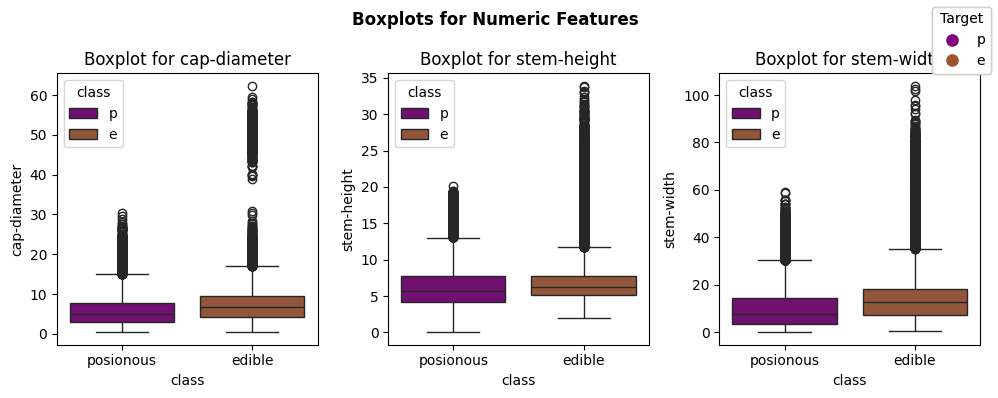

In [15]:
columns = data_numeric.columns

target_mapping = {"p":"purple", "e":"sienna"}
hue_colors = list(target_mapping.values())
hue_labels = list(target_mapping.keys())


fig, axes = plt.subplots(1,3, tight_layout=True, figsize=(10,4))

for col, ax in zip(columns[:-1],axes):
    g = sns.boxplot(y = data_numeric[col], x = data["class"],palette = target_mapping, ax = ax, hue = data["class"])
    g.set_xticks(["p","e"],["posionous", "edible"])
    handles = [plt.Line2D([0], [0], marker='o', color=color, linestyle='', markersize=8) 
           for color in hue_colors]
    fig.legend(handles, hue_labels, loc='upper right', title="Target", fontsize=10)
    g.set_title(f"Boxplot for {col}")
    plt.suptitle("Boxplots for Numeric Features", fontweight="bold")

plt.show()

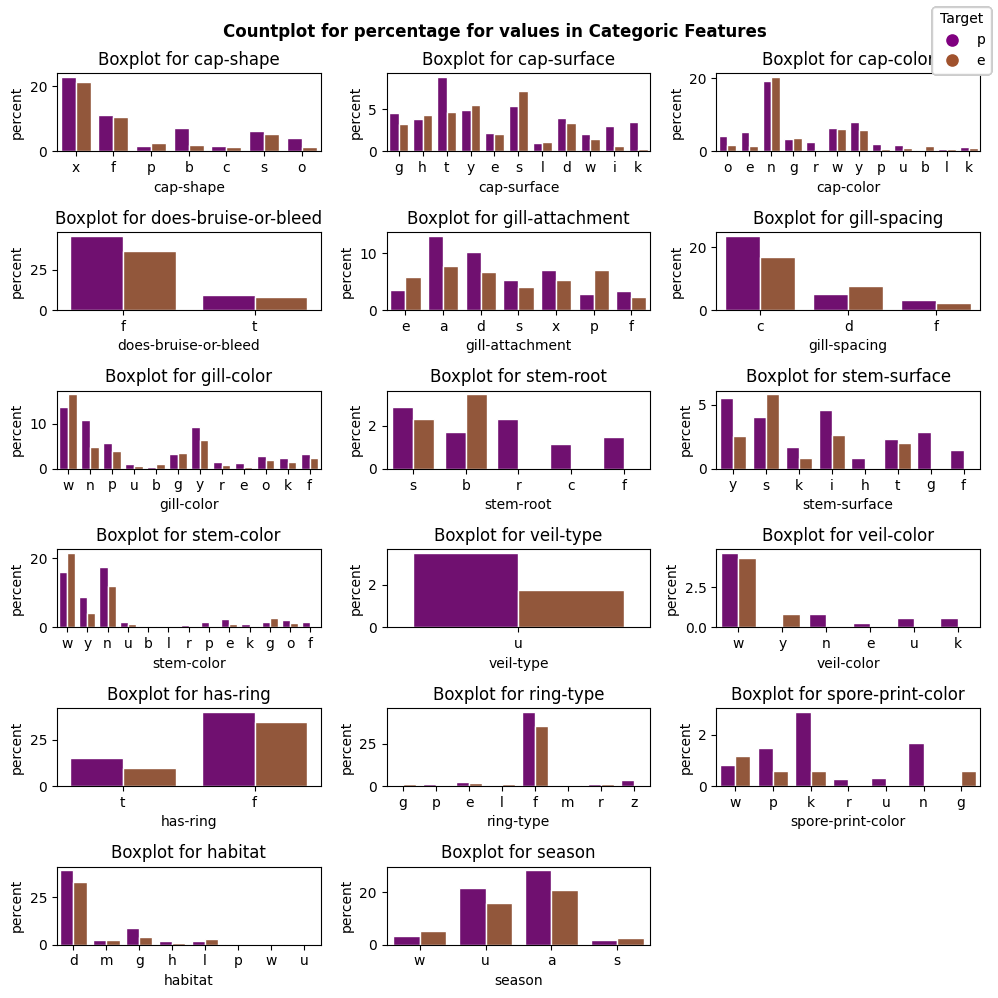

In [16]:
columns = data_categoric.columns

target_mapping = {"p":"purple", "e":"sienna"}
hue_colors = list(target_mapping.values())
hue_labels = list(target_mapping.keys())


fig, axes = plt.subplots(6,3, tight_layout=True, figsize=(10,10))
axes = axes.flatten()

for col, ax in zip(columns[:-1],axes):
    g = sns.countplot(data=data_categoric, x = data[col], stat = "percent", ax = ax, hue = "class", palette = target_mapping, legend=False,edgecolor='white')
    handles = [plt.Line2D([0], [0], marker='o', color=color, linestyle='', markersize=8) 
           for color in hue_colors]
    fig.legend(handles, hue_labels, loc='upper right', title="Target", fontsize=10)
    g.set_title(f"Boxplot for {col}")
    plt.suptitle("Countplot for percentage for values in Categoric Features", fontweight="bold")
    
[fig.delaxes(ax) for ax in axes.flatten() if not ax.has_data()]

plt.show()

# Data Preprocessing

TargetEncoder from sklearn also considers null values as a separate value within each feature, therefore treating missing values
Need to see if it leads to higher overfitting due to data leakage

OneHotEncoder will produce an abundance of dimensions but with less risk for data leakage

In [17]:
from sklearn.preprocessing import TargetEncoder, OneHotEncoder, LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.3, random_state=42
)

scaler = StandardScaler().set_output(transform="pandas")



target_encoder = TargetEncoder(cv=10,shuffle=False).set_output(transform = "pandas")
onehot_encoder = OneHotEncoder().set_output(transform = "pandas")
label_encoder = LabelEncoder()


for col in X_train.select_dtypes(include="object").columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])

    X_test[col] = label_encoder.transform(X_test[col])
    X_val[col] = label_encoder.transform(X_val[col])

In [18]:
y_train

array(['e', 'p', 'p', ..., 'p', 'e', 'p'], dtype=object)

# Feature Selection

In [19]:
X = X_train
y = y_train

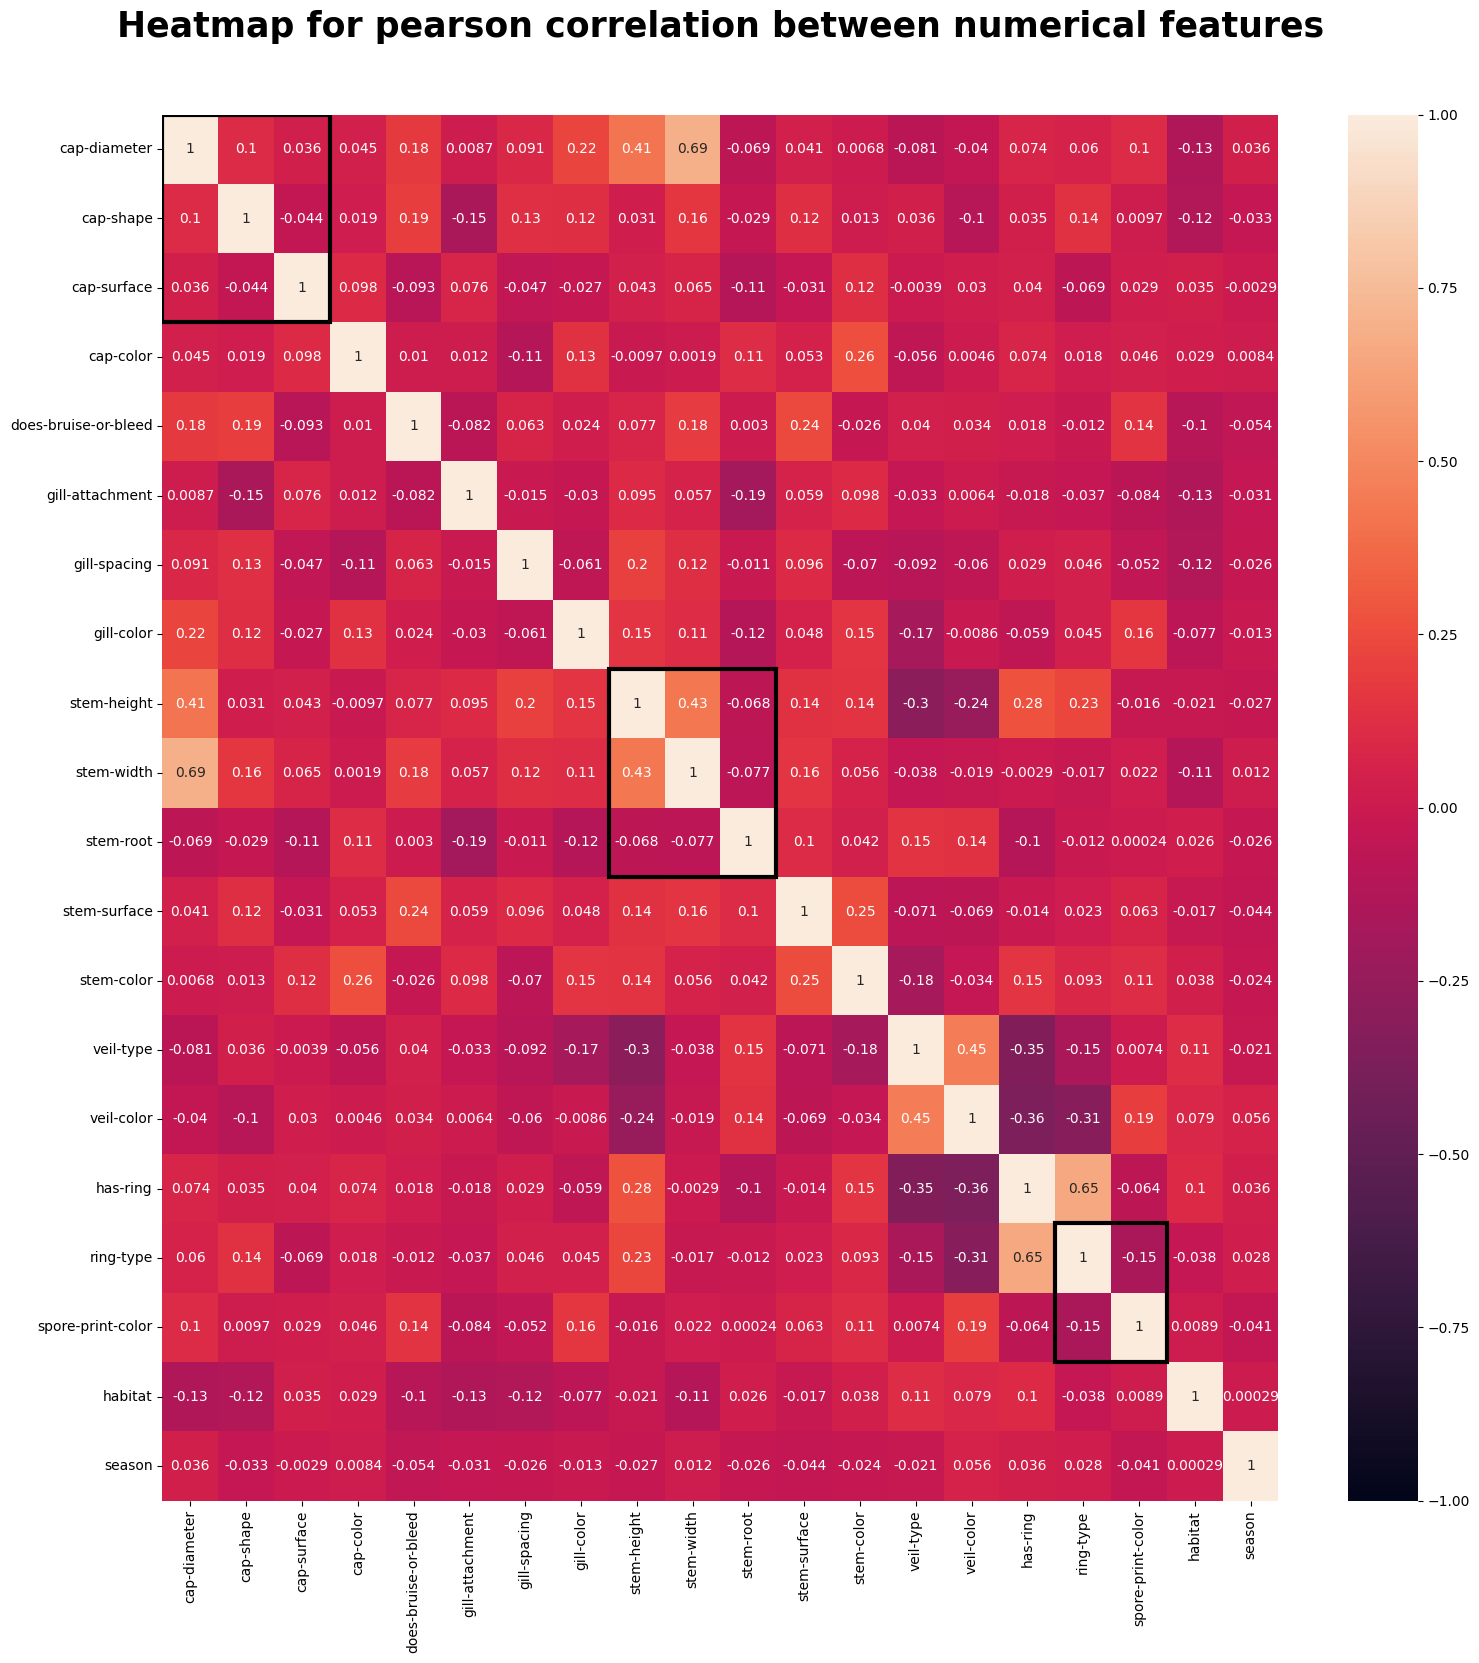

In [20]:
plt.figure(figsize=(18,18))
g = sns.heatmap(data= X.corr(numeric_only=True),vmin=-1, vmax=1, annot=True, cbar=True)
from matplotlib.patches import Rectangle,Circle


#rect = Rectangle((0, 0), 3, 3,linewidth=3, edgecolor='black', facecolor='none')
#g.add_patch(rect)


plt.title("Heatmap for pearson correlation between numerical features", fontweight="bold", fontsize=25,y=1.05)

plt.show()

There doesn't seem to be high correlation between features except for the width of the stem with the cap diameter, gil color and gil spacing, veil color and veil type

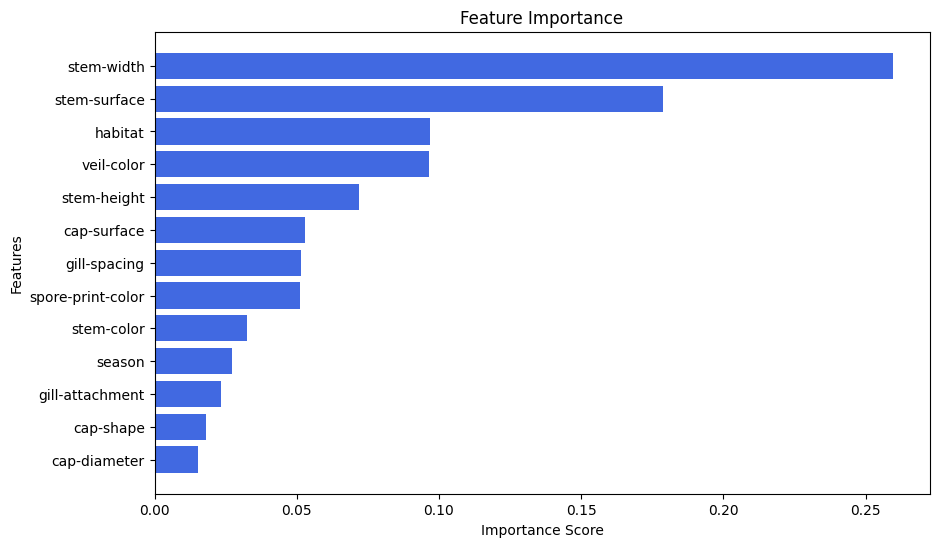

In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=4, 
                              min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                              max_features=0.8, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                              bootstrap=True, oob_score=True, n_jobs=None, random_state=42, verbose=0, 
                              warm_start=False, ccp_alpha=0.0, max_samples=0.8, monotonic_cst=None)

model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)

feature_importances = feature_importances[(feature_importances > 0.01)]
feature_importances = feature_importances.sort_values(ascending=True)

important_features = feature_importances.index


plt.figure(figsize=(10, 6))
plt.barh(y=feature_importances.index, width=feature_importances.values, color='royalblue') 
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [22]:
rf_selected = [
    "stem-width",
    "stem-color",
    "cap-color",
    "gill-spacing",
    "stem-root",
    "stem-surface",
    "gill-attachment",
    "stem-height",
    "veil-color",
    "cap-shape",
    "cap-surface",
    "habitat",
    "gill-color"
]

In [23]:
from sklearn.feature_selection import f_classif #computes ANOVA 
from sklearn.feature_selection import SelectKBest  #Orders f statistics and selects the Kbest ones





anova = SelectKBest(f_classif, k=17)


X_anova = anova.fit_transform(X, y)

anova_results = pd.DataFrame({'Feature': X.columns, 
                              'F-value': anova.scores_,
                              'p-value': anova.pvalues_})

anova_results.sort_values(by='F-value', ascending=False, inplace=True)

selected_features = pd.Series(anova.get_support(), index = X.columns)

selected_features,  anova_results

(cap-diameter             True
 cap-shape                True
 cap-surface              True
 cap-color                True
 does-bruise-or-bleed     True
 gill-attachment         False
 gill-spacing            False
 gill-color               True
 stem-height              True
 stem-width               True
 stem-root               False
 stem-surface             True
 stem-color               True
 veil-type                True
 veil-color               True
 has-ring                 True
 ring-type                True
 spore-print-color        True
 habitat                  True
 season                   True
 dtype: bool,
                  Feature      F-value        p-value
 9             stem-width  1569.920162   0.000000e+00
 0           cap-diameter  1299.265335  7.579261e-280
 11          stem-surface  1211.692193  2.039756e-261
 8            stem-height   559.376209  8.670743e-123
 17     spore-print-color   558.358830  1.432854e-122
 1              cap-shape   475.845388  7.

In [24]:
selected_features_df = selected_features.reset_index()
anova_selected = list(selected_features_df[selected_features_df[0] == True]["index"].values)

In [25]:
anova_selected

['cap-diameter',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-color',
 'stem-height',
 'stem-width',
 'stem-surface',
 'stem-color',
 'veil-type',
 'veil-color',
 'has-ring',
 'ring-type',
 'spore-print-color',
 'habitat',
 'season']

In [26]:
from sklearn.preprocessing import StandardScaler



# Step 3: Initialize the scaler
scaler = StandardScaler().set_output(transform="pandas")

# Step 4: Fit the scaler on the training data **only**
X_train = scaler.fit_transform(X_train)

# Step 5: Transform the validation and test sets using the fitted scaler
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)



# Modelling and Evaluation

On this dataset we will perform leave hold out cross validation for its simplicity, manually splitting the data

In [49]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import KFold, train_test_split
import numpy as np
from sklearn.ensemble import StackingClassifier

def run_model(X, y):
    model = RandomForestClassifier(
        n_estimators=450, criterion='gini', max_depth=12, 
        min_samples_split=2, min_samples_leaf=1, max_features=0.7, 
        bootstrap=True, oob_score=True, random_state=42, max_samples=0.6
    )
    model.fit(X, y)
    return model

In [50]:
def evaluate_model(X, y, model):
    """Evaluate the model on X and y."""
    predictions = model.predict(X)
    
    return f1_score(y, predictions, average='macro')

In [51]:
def avg_score(X_train, X_val, y_train, y_val, model_runner):

    # Train the model on X_train and y_train
    model = model_runner(X_train, y_train)
    
    # Evaluate on training and testing data
    train_score = evaluate_model(X_train, y_train, model)
    validation_score = evaluate_model(X_test, y_test, model)
    
    # Output the scores
    print('Train F1 Score:', train_score)
    print('Validation F1 Score:', validation_score)


In [52]:
#kf = KFold(n_splits=10)
print("Random Forest results:")
avg_score(X_train, X_val, y_train, y_val, model_runner = run_model)

Random Forest results:
Train F1 Score: 0.9969477039708079
Validation F1 Score: 0.9966860104819095


# Test

In [53]:
from sklearn.metrics import f1_score

In [57]:
model = RandomForestClassifier(
        n_estimators=450, criterion='gini', max_depth=11, 
        min_samples_split=2, min_samples_leaf=1, max_features=0.7, 
        bootstrap=True, oob_score=True, random_state=42, max_samples=0.6).fit(X_train, y_train)


In [58]:
y_pred = model.predict(X_test)

In [56]:
f1_score(y_test, y_pred,pos_label='p')

0.9865880619012528

# ROC


This deployment of roc is dynamic since its just a matter of adding to the 3 list

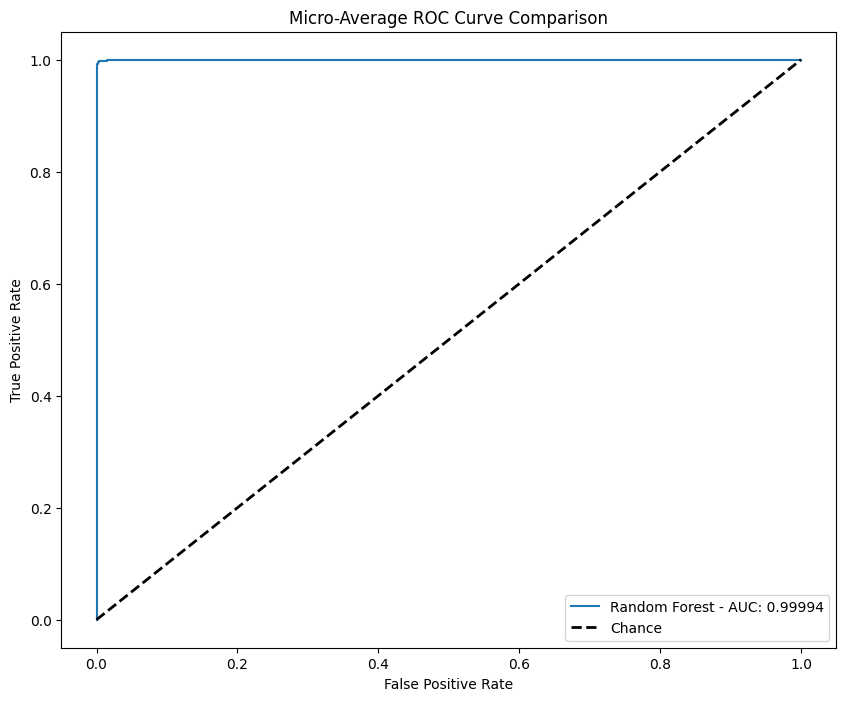

In [59]:
rf_model = run_model(X_train, y_train)

y_score_rf = rf_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_curve, auc
fig, ax = plt.subplots(figsize=(10, 8))

for model, name, y_score in zip(
    [rf_model],  # Correct model objects
    ["Random Forest"],
    [y_score_rf]  # Corresponding probabilities
):
    fpr, tpr, _ = roc_curve(y_test, y_score_rf, pos_label='p')  # Specify the positive class
    auc_score = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f"{name} - AUC: {auc_score:.5f}")
    
ax.plot([0, 1], [0, 1], 'k--', lw=2, label="Chance")
ax.set_title("Micro-Average ROC Curve Comparison")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend(loc="best")
plt.show()

